# Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data.Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many algorithms (like SVM) calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.
Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled.

We will train the machine learning algorithms on 3 types of data:-
* Original
* Normalised (Data will be scaled between 0 and 1)
* Standardised (Data wil have mean of 0 and standard deviation of 1.)<br><br>
We will then compare the performance for best results

In [12]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#loading the data
data= pd.read_csv("D:\\CET\\major\\solar_preprocessed.csv")

In [16]:
data.describe()

,insolation,Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,4.718970,31.119507,73.303503,4.674269,16.259721
std,1.450642,4.446903,12.481483,10.756903,4.381161
min,0.330000,20.000000,38.290000,0.000000,6.600000
25%,4.030000,28.405000,63.160000,0.000000,12.375000
50%,4.790000,30.720000,74.900000,0.630000,17.050000
75%,5.810000,33.830000,84.580000,4.865000,20.375000
max,7.140000,43.380000,94.760000,174.320000,22.250000


In [17]:
#sample of data
data.head()

,insolation,Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity
0,4.30,28.42,61.74,0.0,10.15
1,4.23,28.61,64.57,0.0,10.92
2,4.17,27.46,67.83,0.0,11.30
3,4.36,28.25,56.52,0.0,9.00
4,4.15,27.52,63.82,0.0,10.41


After scaling, we are going to train the model on the dataset. So, the dataset is being spilt into train set and test set. The "sklearn" library has function to split the dataset into train and test set.

"X" label will contain the features, while "y" label will contain the target variable.<br> test_size = Determine the size of test set from dataset. For ex:- 0.2 means 20% of data is taken as test set while 80% data is train set
* X_train = Features of train set 
* X_test = Features of test set
* y_train = Target variable of train set
* y_test = Target variable of train set

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop('insolation',axis=1)
y = data['insolation']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
![Image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Norm_eq.gif)<br> where, Xmin and Xmax is the minimum and maximum value of the feature.

.fit() method learns the parameters required for scaling<br>
.transform() method scales the data according to the formula using the learned parameters in .fit() method

<b> Important Note:- </b> We fit the scaler only on train data, which means we learns the parameters only on train set. Then we transform the train and test data using that scaler. We dont fit the scaler on test set because it will learn the parameters from test data and  will influence the prediction. The test set is meant for testing purpose, not for learning.

In [19]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# copy of datasets to avoid changes on original dataset
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

# numerical features to fit and transform on feature at a time
num_cols = ['Temperature_MAX','Relative_Humidity','Precipitation','Specific_Humidity']

# apply standardization on numerical features
for i in num_cols:
# fit scaler on training data
    norm = MinMaxScaler().fit(X_train_norm[[i]])

# transform training data
    X_train_norm[[i]] = norm.transform(X_train_norm[[i]])

# transform testing dataabs
    X_test_norm[[i]] = norm.transform(X_test_norm[[i]])

Here we can see the minimum value is 0 and maximum value is 1 for all features.

In [20]:
pd.DataFrame(X_train_norm).describe()

,Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,0.476748,0.625745,0.026932,0.624387
std,0.189376,0.223731,0.061855,0.279729
min,0.000000,0.000000,0.000000,0.000000
25%,0.364182,0.440491,0.000000,0.383387
50%,0.458869,0.660914,0.003958,0.685623
75%,0.595116,0.826543,0.028683,0.882428
max,1.000000,1.000000,1.000000,1.000000


Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.![Image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Stand_eq.gif)<br>where, $\mu$ is the mean of the feature values and Feature scaling: $\sigma$ is the standard deviation of the feature values

In [21]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Temperature_MAX','Relative_Humidity','Precipitation','Specific_Humidity']
scaler=[]
# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])
    
    scaler.append(scale)

In [22]:
scaler

[StandardScaler(), StandardScaler(), StandardScaler(), StandardScaler()]

Here we can see the mean is 0 (approx) and standard deviation is 1 (approx).

In [23]:
pd.DataFrame(X_train_stand).describe()

,Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity
count,1.461000e+03,1.461000e+03,1.461000e+03,1.461000e+03
mean,5.855838e-16,1.452181e-16,7.762442e-17,-8.966894e-18
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.518323e+00,-2.797822e+00,-4.355585e-01,-2.232883e+00
25%,-5.946070e-01,-8.283057e-01,-4.355585e-01,-8.618473e-01
50%,-9.444078e-02,1.572477e-01,-3.715440e-01,2.189856e-01
75%,6.252554e-01,8.978049e-01,2.831434e-02,9.227837e-01
max,2.763975e+00,1.673361e+00,1.573690e+01,1.343235e+00


Storing all the train set in a list and test set in other list.

In [24]:
trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# Training

<b> 1. Support Vector Regression (SVR)

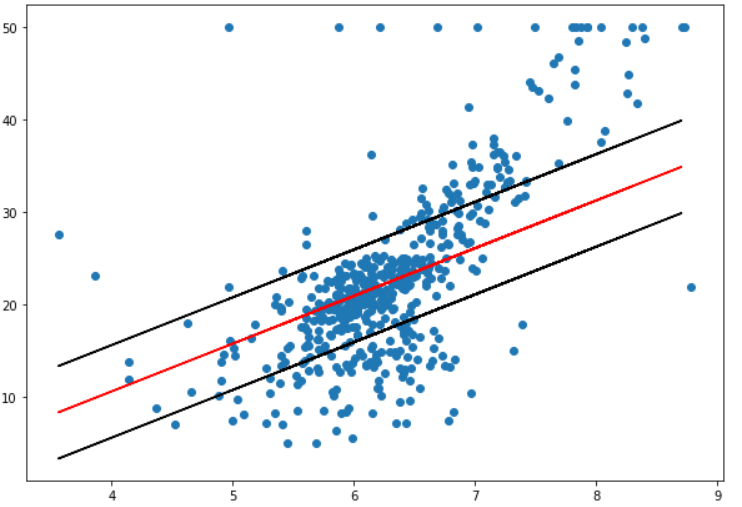

In this algorithm, the model tries to fit the line (red) in the data in such a way that maximum data instances comes between the decision boundaries (black lines). The width of the decision boundaries is decided by the factor epsilon.<br> C is the penalty parameter of the error term.

In [25]:
# training an SVR model
from  sklearn.svm import SVR
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# SVR
svr = SVR(C=7,  epsilon=0.4)

rmse = []

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    svr.fit(trainX[i],y_train)
    # predict
    pred = svr.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_svr = pd.DataFrame({'SVR_RMSE':rmse},index=['Original','Normalized','Standardized'])
df_svr

,SVR_RMSE
Original,0.806319
Normalized,0.781673
Standardized,0.771727


<b>2. K-Nearest Neighbors

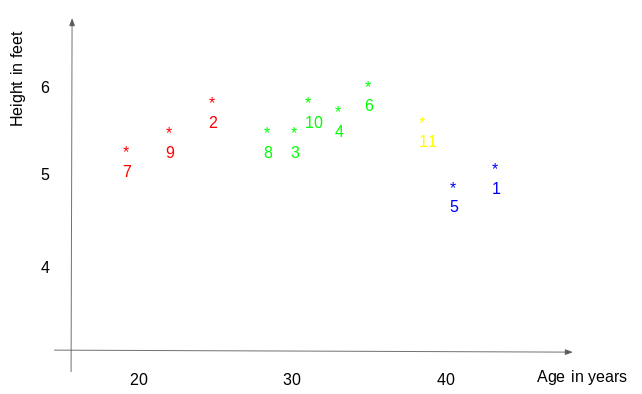

In this algorithm, when new value is predicted as per similarity of data points in training set. The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set. <br>
n_neighbors is the K value, which tells the model to take average of how many data points in train set.


In [26]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
rmse = []

for i in range(len(trainX)):
    
    # fit
    neigh.fit(trainX[i],y_train)
    # predict
    pred = neigh.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_neigh = pd.DataFrame({'NEIGH_RMSE':rmse},index=['Original','Normalized','Standardized'])
df_neigh


,NEIGH_RMSE
Original,0.869779
Normalized,0.873296
Standardized,0.844331


<b>3. Decision Tree

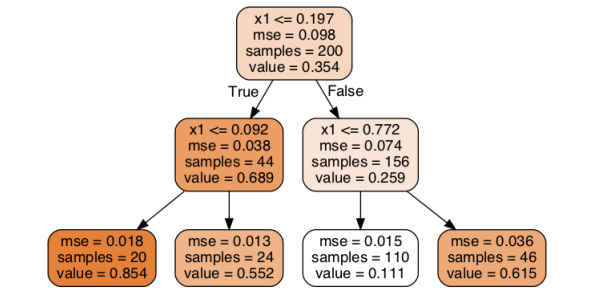

In this algorithm,  the data is split into two  homogeneous sets. This is done using single feature and a threshold. It searches feature and threshold pair which produce purest subsets.<br>
max_depth represents The maximum depth of the tree.<br>
min_samples_leaf represents The minimum number of samples required to be at a leaf node.

In [27]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor(max_depth=4,min_samples_leaf=5)
rmse = []

for i in range(len(trainX)):
    
    # fit
    tree_reg.fit(trainX[i],y_train)
    # predict
    pred = tree_reg.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_tree_reg = pd.DataFrame({'TREE_RMSE':rmse},index=['Original','Normalized','Standardized'])
df_tree_reg

,TREE_RMSE
Original,0.819855
Normalized,0.819855
Standardized,0.819855


<b>4. Random Forest

It is the collection of many decision trees. The predicted value is the average of all decision trees predicted values.<br>
n_estimators = number of decision tree models<br>
n_jobs = how many cores to use while training. -1 means to use all cores

In [28]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(  max_depth=6,n_estimators=500, n_jobs=-1) 
rmse = []

for i in range(len(trainX)):
    
    # fit
    rnd_reg.fit(trainX[i],y_train)
    # predict
    pred = rnd_reg.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_rnd_reg = pd.DataFrame({'RND_RMSE':rmse},index=['Original','Normalized','Standardized'])
df_rnd_reg

,RND_RMSE
Original,0.774881
Normalized,0.775393
Standardized,0.775781


<b>5. Voting Regressor

In this algorithm, different types of machine learning models are trained and their predictions are aggregated. Then it averages the individual predictions to form a final prediction.

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm      import SVR
from sklearn.ensemble import VotingRegressor
 
rnd = RandomForestRegressor(max_depth=6,n_estimators=500) 
svm = SVR(C=7,  epsilon=0.4)

voting_reg = VotingRegressor( estimators=[ ('rf', rnd), ('svr', svm)], n_jobs=-1)
rmse = []

for i in range(len(trainX)):
    
    # fit
    voting_reg.fit(trainX[i],y_train)
    # predict
    pred = voting_reg.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_voting_reg = pd.DataFrame({'VOTING_RMSE':rmse},index=['Original','Normalized','Standardized'])
df_voting_reg

,VOTING_RMSE
Original,0.774781
Normalized,0.763322
Standardized,0.762817


<b>6. Bagging Regressor

A Bagging regressor is an ensemble of base regressors each on random subsets of the original dataset and then aggregate their individual predictions ( by averaging) to form a final prediction. The subset are sampled with replacement.

In [30]:
from sklearn.ensemble import BaggingRegressor
svm = SVR(C=7,  epsilon=0.4)

bag_reg = BaggingRegressor(base_estimator=svm, n_estimators=50)
rmse = []

for i in range(len(trainX)):
    
    # fit
    bag_reg.fit(trainX[i],y_train)
    # predict
    pred = bag_reg.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_bag_reg = pd.DataFrame({'BAG_RMSE':rmse},index=['Original','Normalized','Standardized'])
df_bag_reg

,BAG_RMSE
Original,0.807482
Normalized,0.779764
Standardized,0.779337


<b>7. AdaBoost Regressor

The algorithm first trains a base classifier and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instance weights, and so on.<br>

Learning rate shrinks the contribution of each regressor by learning_rate

In [31]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor( DecisionTreeRegressor(max_depth=10),learning_rate=0.02)
rmse = []

for i in range(len(trainX)):
    
    # fit
    ada_reg.fit(trainX[i],y_train)
    # predict
    pred = ada_reg.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_ada_reg = pd.DataFrame({'ADA_RMSE':rmse},index=['Original','Normalized','Standardized'])
df_ada_reg

,ADA_RMSE
Original,0.785136
Normalized,0.797334
Standardized,0.784595


<b>8. Gradient Boosting

Similar as above algorithm, , instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.

gamma = Minimum loss reduction required to make a further partition on a leaf node of the tree.

In [32]:
import xgboost
xgb_reg = xgboost.XGBRegressor(n_estimators=23,max_depth=5 ,n_jobs=-1 ,gamma=0.01)

rmse = []

for i in range(len(trainX)):
    
    # fit
    xgb_reg.fit(trainX[i],y_train)
    # predict
    pred = xgb_reg.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result    
df_xgb_reg = pd.DataFrame({'XGB_RMSE':rmse},index=['Original','Normalized','Standardized'])
df_xgb_reg

,XGB_RMSE
Original,0.788517
Normalized,0.788686
Standardized,0.789015


We have experimented all the 3 types of data with differnt kinds of algorithms. Let's look at all the errors in a table.

In [33]:
df=pd.concat([df_svr,df_neigh,df_tree_reg,df_rnd_reg,df_voting_reg,df_bag_reg,df_ada_reg, df_xgb_reg], axis=1)
df

,SVR_RMSE,NEIGH_RMSE,TREE_RMSE,RND_RMSE,VOTING_RMSE,BAG_RMSE,ADA_RMSE,XGB_RMSE
Original,0.806319,0.869779,0.819855,0.774881,0.774781,0.807482,0.785136,0.788517
Normalized,0.781673,0.873296,0.819855,0.775393,0.763322,0.779764,0.797334,0.788686
Standardized,0.771727,0.844331,0.819855,0.775781,0.762817,0.779337,0.784595,0.789015


Here, we can clearly see that the standardized set trained on Voting Regressor has the minimum error. So, we this particular model with specific hyperparameters for prediction of solar insolation.

# Prediction

Now, we will define a predict function which will take model,  as arguments and predict the solar insolation.<br>The function will standardize the data according to the scaler which was trained on train set and predict the output according to the transformed data.

In [34]:
def predict(model,data,scaler):
    """
    This fuction will take 3 arguments:-
    model:- Predictive model
    data:- a dataframe containing the parameters used for prediction
    scaler:- an array containg all the scalers for particular feature 
    """
    #Initialising an empty list to store the transformed values
    transformed_data=[]
    
    #scaling the feature value according to respective scaler
    for i in range(len(scaler)):
        a= scaler[i].transform(data[[i]]) # this performs transformation
        transformed_data.append(a[0]) #appending the transformed value in the list
        
    # Converting the list to dataframe
    transformed_data= pd.DataFrame(transformed_data)
    transformed_data=transformed_data.transpose()
    
    #storing the prediction and returning the output
    result=model.predict(transformed_data)
    return print(f'The solar insolation for given parameters is {result[0]}')

In [38]:
#Parameters required for prediction
Temperature_MAX =24.08 # in degree celsius
Relative_Humidity=70.22 # in %
Precipitation=25.37 # in mm/day
Specific_Humidity=10.44 # in g/kg

In [39]:
#Storing all the parameters in the dataframe
data=pd.DataFrame([[Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity]])

In [40]:
#Performing prediction
predict(voting_reg,data,scaler)

The solar insolation for given parameters is 3.0230918463246192
